# Lesson 6 : EPICS area detector

Start the instrument package as our routine initialization.

In [1]:
from instrument.collection import *

I Fri-10:57:25 - ############################################################ startup
I Fri-10:57:25 - logging started
I Fri-10:57:25 - logging level = 10
I Fri-10:57:25 - /home/mintadmin/Documents/projects/use_bluesky/lessons/instrument/collection.py
I Fri-10:57:25 - /home/mintadmin/Documents/projects/use_bluesky/lessons/instrument/mpl/notebook.py


Activating auto-logging. Current session state plus future input saved.
Filename       : /home/mintadmin/Documents/projects/use_bluesky/lessons/.logs/ipython_console.log
Mode           : rotate
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active


I Fri-10:57:25 - bluesky framework
I Fri-10:57:25 - /home/mintadmin/Documents/projects/use_bluesky/lessons/instrument/framework/check_python.py
I Fri-10:57:25 - /home/mintadmin/Documents/projects/use_bluesky/lessons/instrument/framework/check_bluesky.py
I Fri-10:57:26 - /home/mintadmin/Documents/projects/use_bluesky/lessons/instrument/framework/initialize.py
I Fri-10:57:27 - /home/mintadmin/Documents/projects/use_bluesky/lessons/instrument/framework/metadata.py
I Fri-10:57:27 - /home/mintadmin/Documents/projects/use_bluesky/lessons/instrument/framework/callbacks.py
I Fri-10:57:27 - writing to SPEC file: /home/mintadmin/Documents/projects/use_bluesky/lessons/20200508-105727.dat
I Fri-10:57:27 -    >>>>   Using default SPEC file name   <<<<
I Fri-10:57:27 -    file will be created when bluesky ends its next scan
I Fri-10:57:27 -    to change SPEC file, use command:   newSpecFile('title')


The EPICS area detector support in ophyd has many features, some of them specific to the detector make and model.  Let's start with just a few features using the ADSimDetector.  We'll need to import support from ophyd by parts as they are needed.

As we add features from the area detector plugins or other capabilities, the configuration complexity will increase.  So, it is good to start with a simple case where we can control the camera and generate images.

In [2]:
from ophyd import Component
from ophyd.areadetector import ImagePlugin
from ophyd.areadetector import SimDetector
from ophyd.areadetector import SingleTrigger

In [3]:
_ad_prefix = "adsky:"

In [4]:
class MySingleTriggerSimDetector(SingleTrigger, SimDetector): 
       
    image = Component(ImagePlugin, suffix="image1:")

In [5]:
adsimdet = MySingleTriggerSimDetector(_ad_prefix, name='adsimdet')

In [6]:
adsimdet.stage_sigs["cam.num_images"] = 1
adsimdet.stage_sigs["cam.acquire_time"] = 0.1
adsimdet.stage_sigs["cam.acquire_period"] = 0.25

adsimdet.stage_sigs

OrderedDict([('cam.acquire', 0),
             ('cam.image_mode', 1),
             ('cam.num_images', 1),
             ('cam.acquire_time', 0.1),
             ('cam.acquire_period', 0.25)])

In [7]:
RE(bp.count([adsimdet]))



Transient Scan ID: 1     Time: 2020-05-08 10:57:27
Persistent Unique Scan ID: '8e93c89f-56f1-432f-8865-861101c40fc9'
New stream: 'primary'
+-----------+------------+
|   seq_num |       time |
+-----------+------------+
|         1 | 10:57:28.1 |
+-----------+------------+
generator count ['8e93c89f'] (scan num: 1)


('8e93c89f-56f1-432f-8865-861101c40fc9',)

Get the detector image and display it.  In the initial instrument setup, MatPlotLib was initialized for our display.  We need a copy of the plotting object that was created, `plt` to show the detector image.

<IPython.core.display.Javascript object>


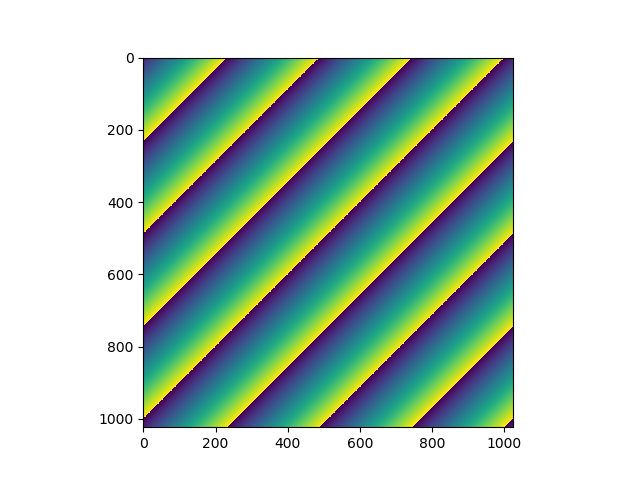

In [8]:
from instrument.mpl import plt

# The image comes from EPICS AD as a 1-D array, row by row.
# We need to make it into a 2-D array, so first we need to
# get the number of rows and columns from the image plugin.

array_size = adsimdet.image.array_size.get()
shape = (array_size.height, array_size.width)

# Now, get the image and make it a 2-D array.
im = adsimdet.image.array_data.get().reshape(shape)

# Tell MatPlotLib to show the image.
plt.imshow(im)

It's useful to make these steps into a Python function.

In [9]:
def show_ad_image(det):
    array_size = det.image.array_size.get()
    shape = (array_size.height, array_size.width)
    im = det.image.array_data.get().reshape(shape)
    plt.imshow(im)
    # If you have called this previously using 
    # the same detector with same image size,
    # the new image will be redrawn in that
    # notebook cell.

In [10]:
show_ad_image(adsimdet)

Save image(s) to HDF5 file.